In [3]:
! pip3 install tqdm

You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
! pip3 install scipy

You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
from pprint import pprint
import math
from scipy import log,exp,sqrt,stats
from tqdm import tqdm

In [2]:
data = pd.read_csv("resources/dataset_train.csv")
#data_test = pd.read_csv("resources/dataset_test.csv")

In [3]:
data.head(10)

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
5,5,Slytherin,Corrine,Hammond,1999-04-04,Right,21209.0,-613.687160,-4.289197,6.136872,-6.592,-440.997704,396.201804,5.380286,1052.845164,11.751212,1.049894,-247.94549,-34.69
6,6,Gryffindor,Tom,Guido,2000-09-30,Left,49167.0,628.046051,-4.861976,-6.280461,NaN,-926.892512,583.742442,-7.322486,923.539573,1.646666,0.153022,-257.83447,261.55
7,7,Hufflepuff,Alicia,Hayward,1997-07-08,Right,33010.0,411.412727,5.931832,-4.114127,2.769,-502.021336,439.351416,NaN,1041.091935,6.581791,-0.171704,-244.03492,72.25
8,8,Gryffindor,Bella,Leatherman,1998-12-07,Left,20278.0,496.394945,-5.215891,-4.963949,5.855,-626.552041,567.842402,-6.198661,925.255500,1.086518,1.147032,-252.27561,244.11
9,9,Hufflepuff,Hayden,Aponte,2001-10-13,Right,46316.0,527.193585,7.922205,-5.271936,3.356,-398.101991,341.475606,4.978614,1041.414665,2.068824,-0.529579,-244.57527,-0.09


In [4]:
data.mean()

Index                              799.500000
Arithmancy                       49634.570243
Astronomy                           39.797131
Herbology                            1.141020
Defense Against the Dark Arts       -0.387863
Divination                           3.153910
Muggle Studies                    -224.589915
Ancient Runes                      495.747970
History of Magic                     2.963095
Transfiguration                   1030.096946
Potions                              5.950373
Care of Magical Creatures           -0.053427
Charms                            -243.374409
Flying                              21.958012
dtype: float64

In [5]:
data_clean = data.fillna(data.mean())
data_clean

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.000000,-487.886086,5.727180,4.878861,4.72200,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.000000,-552.060507,-5.987446,5.520605,-5.61200,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.000000,-366.076117,7.725017,3.660761,6.14000,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.000000,697.742809,-6.497214,-6.977428,4.02600,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.000000,436.775204,-7.820623,-0.387863,2.23600,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
5,5,Slytherin,Corrine,Hammond,1999-04-04,Right,21209.000000,-613.687160,-4.289197,6.136872,-6.59200,-440.997704,396.201804,5.380286,1052.845164,11.751212,1.049894,-247.94549,-34.69
6,6,Gryffindor,Tom,Guido,2000-09-30,Left,49167.000000,628.046051,-4.861976,-6.280461,3.15391,-926.892512,583.742442,-7.322486,923.539573,1.646666,0.153022,-257.83447,261.55
7,7,Hufflepuff,Alicia,Hayward,1997-07-08,Right,33010.000000,411.412727,5.931832,-4.114127,2.76900,-502.021336,439.351416,2.963095,1041.091935,6.581791,-0.171704,-244.03492,72.25
8,8,Gryffindor,Bella,Leatherman,1998-12-07,Left,20278.000000,496.394945,-5.215891,-4.963949,5.85500,-626.552041,567.842402,-6.198661,925.255500,1.086518,1.147032,-252.27561,244.11
9,9,Hufflepuff,Hayden,Aponte,2001-10-13,Right,46316.000000,527.193585,7.922205,-5.271936,3.35600,-398.101991,341.475606,4.978614,1041.414665,2.068824,-0.529579,-244.57527,-0.09


### Liste des variables

In [6]:
column_names_list = list(data_clean.columns)
column_names_list

['Index',
 'Hogwarts House',
 'First Name',
 'Last Name',
 'Birthday',
 'Best Hand',
 'Arithmancy',
 'Astronomy',
 'Herbology',
 'Defense Against the Dark Arts',
 'Divination',
 'Muggle Studies',
 'Ancient Runes',
 'History of Magic',
 'Transfiguration',
 'Potions',
 'Care of Magical Creatures',
 'Charms',
 'Flying']

### Definir m

In [7]:
m = data_clean['Index'].shape[0]
m
type(m)

int

### Normalize

#### with pandas

In [8]:
df = data_clean[column_names_list[6:19]]
data_norm = (df - df.mean()) / (df.max() - df.min())
data_norm

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,6.765407e-02,-0.266110,0.209332,2.656001e-01,0.083591,0.227927,7.959727e-02,0.109306,0.050389,-1.184586e-01,1.207754e-01,0.297028,-0.106067
1,1.361244e-01,-0.298473,-0.325374,2.979632e-01,-0.467291,-0.120589,-2.773137e-01,0.055140,0.149990,7.120497e-02,2.277807e-02,-0.247323,-0.294020
2,-2.005209e-01,-0.204681,0.300522,2.041715e-01,0.159182,0.408229,2.314868e-01,0.028555,0.301519,1.523594e-01,-7.250921e-02,0.450068,0.018374
3,-1.312000e-01,0.331801,-0.348642,-3.323108e-01,0.046489,-0.143381,6.117559e-02,-0.374613,-0.570400,-2.812544e-01,6.182943e-03,-0.378216,0.387984
4,8.137134e-02,0.200195,-0.409048,2.799419e-18,-0.048932,-0.100819,2.244216e-01,-0.308813,-0.481785,-8.990266e-02,-3.306682e-02,-0.365317,0.295353
5,-2.197978e-01,-0.329551,-0.247858,3.290414e-01,-0.519532,-0.099320,-2.156889e-01,0.116498,0.118276,3.181288e-01,1.731998e-01,-0.128326,-0.123003
6,-3.615439e-03,0.296653,-0.274002,-2.971628e-01,0.000000,-0.322322,1.906596e-01,-0.495722,-0.554032,-2.360233e-01,3.240844e-02,-0.405945,0.520241
7,-1.285478e-01,0.187405,0.218673,-1.879149e-01,-0.020519,-0.127327,-1.221957e-01,0.000000,0.057167,3.462816e-02,-1.856722e-02,-0.018543,0.109202
8,-2.269967e-01,0.230262,-0.290157,-2.307713e-01,0.143989,-0.184481,1.562086e-01,-0.441558,-0.545110,-2.667429e-01,1.884485e-01,-0.249888,0.482373
9,-2.566050e-02,0.245793,0.309522,-2.463030e-01,0.010773,-0.079633,-3.342654e-01,0.097140,0.058845,-2.128714e-01,-7.474644e-02,-0.033712,-0.047874


#### with python

In [9]:
#pour un feature
def centrer_reduire_feature (X):
    stdev = statistics.stdev(X)
    mean = statistics.mean(X)
    A = []
    for x in X :
        a = float((x - mean)/stdev)
        A.append(a)
    return np.array(A), stdev, mean

In [10]:
# pour plusieures features a la fois
def centrer_reduire_matrix(XXX):
    mean = XXX.mean(axis=0)
    stdev = XXX.std(axis=0)
    XXX = (XXX - mean)/stdev
    return XXX, mean, stdev

### Definir X 

In [11]:
# Add a column of ones in X
X0 = np.ones(m)
X0[:10]
X0.shape


(1600,)

In [12]:
X1 = list(data_clean['Best Hand'])
set(X1)

{'Left', 'Right'}

In [13]:

X1 = [0.0 if el == 'Left' else 1.0 for el in X1 ]
X1 = np.array(X1)
X1[:10]
set(X1)

{0.0, 1.0}

In [14]:
#X2_15 = data_clean[column_names_list[6:19]]
X2_15 = data_norm
X2_15[:10]

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0.067654,-0.266110,0.209332,2.656001e-01,0.083591,0.227927,0.079597,0.109306,0.050389,-0.118459,0.120775,0.297028,-0.106067
1,0.136124,-0.298473,-0.325374,2.979632e-01,-0.467291,-0.120589,-0.277314,0.055140,0.149990,0.071205,0.022778,-0.247323,-0.294020
2,-0.200521,-0.204681,0.300522,2.041715e-01,0.159182,0.408229,0.231487,0.028555,0.301519,0.152359,-0.072509,0.450068,0.018374
3,-0.131200,0.331801,-0.348642,-3.323108e-01,0.046489,-0.143381,0.061176,-0.374613,-0.570400,-0.281254,0.006183,-0.378216,0.387984
4,0.081371,0.200195,-0.409048,2.799419e-18,-0.048932,-0.100819,0.224422,-0.308813,-0.481785,-0.089903,-0.033067,-0.365317,0.295353
5,-0.219798,-0.329551,-0.247858,3.290414e-01,-0.519532,-0.099320,-0.215689,0.116498,0.118276,0.318129,0.173200,-0.128326,-0.123003
6,-0.003615,0.296653,-0.274002,-2.971628e-01,0.000000,-0.322322,0.190660,-0.495722,-0.554032,-0.236023,0.032408,-0.405945,0.520241
7,-0.128548,0.187405,0.218673,-1.879149e-01,-0.020519,-0.127327,-0.122196,0.000000,0.057167,0.034628,-0.018567,-0.018543,0.109202
8,-0.226997,0.230262,-0.290157,-2.307713e-01,0.143989,-0.184481,0.156209,-0.441558,-0.545110,-0.266743,0.188448,-0.249888,0.482373
9,-0.025661,0.245793,0.309522,-2.463030e-01,0.010773,-0.079633,-0.334265,0.097140,0.058845,-0.212871,-0.074746,-0.033712,-0.047874


In [15]:
#X2_15 = np.array(data_clean[column_names_list[6:19]])
X2_15 = np.array(data_norm)
X2_15[:10]


array([[ 6.76540661e-02, -2.66109864e-01,  2.09331933e-01,
         2.65600129e-01,  8.35913602e-02,  2.27926506e-01,
         7.95972652e-02,  1.09306272e-01,  5.03888627e-02,
        -1.18458638e-01,  1.20775433e-01,  2.97027718e-01,
        -1.06066818e-01],
       [ 1.36124443e-01, -2.98472930e-01, -3.25373553e-01,
         2.97963194e-01, -4.67290883e-01, -1.20589471e-01,
        -2.77313732e-01,  5.51396162e-02,  1.49989672e-01,
         7.12049728e-02,  2.27780651e-02, -2.47323079e-01,
        -2.94020091e-01],
       [-2.00520933e-01, -2.04681277e-01,  3.00521702e-01,
         2.04171542e-01,  1.59181744e-01,  4.08228637e-01,
         2.31486790e-01,  2.85552452e-02,  3.01518931e-01,
         1.52359354e-01, -7.25092066e-02,  4.50067601e-01,
         1.83740555e-02],
       [-1.31199993e-01,  3.31801030e-01, -3.48641569e-01,
        -3.32310766e-01,  4.64891693e-02, -1.43381202e-01,
         6.11755909e-02, -3.74612822e-01, -5.70399806e-01,
        -2.81254433e-01,  6.18294344e

In [16]:
set(X2_15[:,1])

{0.21096314621997436,
 0.3275716465310552,
 -0.28133702849191167,
 -0.32676430806676393,
 0.22909604142294526,
 0.3106404052265219,
 -0.3033631983564078,
 0.2622405323629202,
 -0.28117718813598813,
 0.3180864944299451,
 -0.26829495483930993,
 0.2371126037762963,
 -0.24083253188917195,
 2.866605189045756e-17,
 0.1677885491125082,
 -0.25894697262554794,
 0.32929286513586226,
 -0.2893996183307443,
 0.3027849180659495,
 -0.35173794197007163,
 -0.2361368025973966,
 -0.306901249998841,
 -0.27728674647698165,
 0.08044256330868654,
 -0.24887677461084573,
 -0.4184789642618494,
 0.3273476608528583,
 -0.26525507845551544,
 -0.26478035670078587,
 0.1096822907705431,
 0.24331893880535643,
 -0.2352643674931655,
 0.19807018630579173,
 -0.13091336515615373,
 0.11969475173489039,
 -0.191929099998866,
 -0.17882054442183906,
 0.13499308800940577,
 0.18082425972911773,
 0.027119666744937466,
 0.14444349572119075,
 0.3352031631138567,
 0.3125322669974474,
 -0.22430025020827304,
 0.26549655747438916,
 -0.19

In [17]:
X = np.c_[X0, X1, X2_15]
X[:3]

array([[ 1.        ,  0.        ,  0.06765407, -0.26610986,  0.20933193,
         0.26560013,  0.08359136,  0.22792651,  0.07959727,  0.10930627,
         0.05038886, -0.11845864,  0.12077543,  0.29702772, -0.10606682],
       [ 1.        ,  1.        ,  0.13612444, -0.29847293, -0.32537355,
         0.29796319, -0.46729088, -0.12058947, -0.27731373,  0.05513962,
         0.14998967,  0.07120497,  0.02277807, -0.24732308, -0.29402009],
       [ 1.        ,  0.        , -0.20052093, -0.20468128,  0.3005217 ,
         0.20417154,  0.15918174,  0.40822864,  0.23148679,  0.02855525,
         0.30151893,  0.15235935, -0.07250921,  0.4500676 ,  0.01837406]])

In [18]:
X.shape[0]

1600

In [19]:
# premiere colonne de X (X0)
X[:,0]
# deuxieme colonne de X (hands right=0 left=1)
X[:,1]
# troisieme colonne de X (Arithmacy)
X[:,2]

array([ 0.06765407,  0.13612444, -0.20052093, ...,  0.11034463,
        0.25577556, -0.00769814])

### Definir Y

In [20]:
y_raw = list(data['Hogwarts House'])
s = set(y_raw)
s

{'Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin'}

In [21]:
y = np.array([ord(a[0]) for a in y_raw])
y[:10]

array([82, 83, 82, 71, 71, 83, 71, 72, 71, 72])

In [22]:
y_Gry = np.array([1.0 if el == 'Gryffindor' else 0.0 for el in y_raw ])
y_Huf = np.array([1.0 if el == 'Hufflepuff' else 0.0 for el in y_raw ])
y_Rav = np.array([1.0 if el == 'Ravenclaw' else 0.0 for el in y_raw ])
y_Sly = np.array([1.0 if el == 'Slytherin' else 0.0 for el in y_raw ])

In [23]:
y_Gry.shape, y_Huf.shape, y_Rav.shape, y_Sly.shape

((1600,), (1600,), (1600,), (1600,))

In [24]:
Y = []
for name in s :  
    Y.append([1.0 if el == name else 0.0 for el in y_raw ])
Y = np.array(Y)
Y

array([[0., 0., 0., ..., 0., 1., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [25]:
Y = Y.T

In [26]:
Y.shape

(1600, 4)

### Definir Theta


In [27]:
theta = np.zeros(15)
#theta = np.array([0.1,0.1,0.1,0.1,0.1,0.2,0.3,0.1,0.1,0.2,0.3,0.1,0.1,0.2,0.1])

In [28]:
X.shape, Y.shape, theta.shape

((1600, 15), (1600, 4), (15,))

In [29]:
X.shape[0]

1600

In [30]:
type(X), type(y), type(theta)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

### Model lineaire :  Hypothese y=ax+b

In [31]:
def hipothesis_linear(X, theta):
    #return theta[0] + theta[1] * X
    return np.dot(X, theta)

In [32]:
# test hipothesis
h = hipothesis_linear(X[:,0:2], theta[0:2])
h.shape
set(h)
h[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Model logistic :  Hypothese sigmoidale

In [33]:
def sigmoid(z):
    # VERSION NUMPY
    #return 1/(1 + np.exp(-z))
    # VERSION SCIPY
    return 1/(1 + exp(-z))

In [34]:
# test sigmoid
sigmoid(-10)

4.5397868702434395e-05

In [35]:
def hipothesis_log(X, theta):  
    return (sigmoid(np.dot(X, theta)))
    # returns a 100 x 1 matrix

In [36]:
# test hipothesis
h = hipothesis_log(X[:,0:15], theta[0:15])
h.shape

(1600,)

### Tester la fonction du cout logistique

In [37]:
def cost_linear(X, y, theta):
    m = X.shape[0]
    print("m=", m)
    loss = hipothesis_linear(X, theta) - y
    print("loss=", loss)
    print('loss shape=', loss.shape)
    print("loss values=", set(loss))
    #mean_loss = np.sum((loss ** 2) ** 0.5)/ m
    #print("mean_loss=", mean_loss)
    loss2 = loss ** 2
    print("loss2=", loss2)
    print('loss shape=', loss2.shape)
    c = np.sum(loss2)
    print("c=" , c)
    cost = (np.sum(loss ** 2)) / (2 * m) 
    print("cost", cost)
    return cost

In [38]:
cost_linear(X[:,0:15], y_Gry, theta[0:15])

m= 1600
loss= [ 0.  0.  0. ... -1.  0.  0.]
loss shape= (1600,)
loss values= {0.0, -1.0}
loss2= [0. 0. 0. ... 1. 0. 0.]
loss shape= (1600,)
c= 327.0
cost 0.1021875


0.1021875

In [39]:
# cost 2018
def cost_log_2018(X, y, theta):
    m = X.shape[0]
    hip = hipothesis_log(X, theta)
    hip[hip == 1] = 0.999 
    #print("hip=", hip)
    c1 = np.dot(y.T, np.log(hip))
    print("cost Y=", c1)
    c2 = np.dot((1-y).T, np.log(1-hip))
    print("cost 1-Y=", c2)
    cost = -  (c1 + c2)  /  m
    return cost

In [40]:
cost_log_2018(X[:,0:15], y_Gry, theta[0:15])

cost Y= -226.6591280431021
cost 1-Y= -882.3763608528106


0.6931471805599455

In [41]:
# cost 2019
def cost_log_2019(X, y, theta):
    m = X.shape[0]
    hip = hipothesis_log(X, theta)
    #print("hip=", hip)
    hip[hip == 1] = 0.999 
    #print("hip=", hip)
    loss = y * np.log(hip) + (1-y) * np.log(1-hip)
    #print("loss=", loss)
    cost =  (-1/m) * (np.sum(loss)) 
    return cost


In [42]:
cost_log_2019(X[:,0:15], y_Gry, theta[0:15])

0.6931471805599452

In [43]:
def predict(X, theta):
      return(sigmoid(np.dot(X, theta)))

In [44]:
def cost(X, y, theta):
    return((-1 / X.shape[0]) * np.sum(y * np.log(predict(X, theta)) + (1 - y) * np.log(1 - predict(X, theta))))

In [45]:
cost(X[:,0:15], y_Gry, theta[0:15])

0.6931471805599452

### Training

In [46]:

def fit(X, y, theta, alpha, num_iters):
    # Initialiser certaines variables utiles
    m = X.shape[0]
    J_history = []
    for _ in tqdm(range(num_iters)):
    #for _ in range(num_iters):
        #loss = hipothesis_log(X, theta) - y
        #gradient = (alpha / m) * (np.dot(loss, X))
        #theta = theta - gradient
        theta = theta - (alpha/m) * np.dot((predict(X, theta) - y), X)
        cost = cost_log_2019(X, y, theta)
        J_history.append(cost)
        #J_history.append(cost(X, y, theta))
    return theta, J_history

In [47]:
theta = np.zeros(15)
theta, J_history = fit(X, y_Gry, theta, 0.05547, 200000)

100%|██████████| 200000/200000 [00:44<00:00, 4465.68it/s]


In [48]:
theta

array([-3.9722245 ,  0.6466751 , -4.38681363,  1.08499541, -6.33317829,
       -0.94957602,  4.8350571 ,  0.09037308,  4.57397408, -2.65027486,
       -3.73571991, -0.94770564,  0.55564161, -0.72931256,  4.76197122])

In [49]:
J_history[-1]

0.04276325240001377

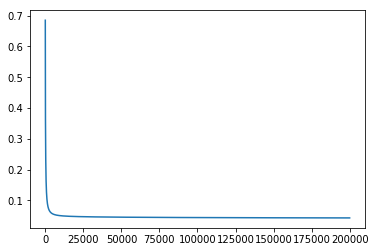

In [54]:
visualize_cost(J_history)

In [53]:
import matplotlib.pyplot as plt

def visualize_cost(J_history) :
    %matplotlib inline
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(J_history)


### One vs all training

In [56]:
classifiers = []
costs = []
for c in range(0, 4):
    label = Y[:,c]
    print("shape",label.shape)
    theta = np.zeros(15)
    classifier, J_history = fit(X, y_Gry, theta, 0.05547, 40000)
    print(classifier[0:20])
    classifiers.append(classifier)
    costs.append(J_history)
    #classifiers[c, :] , costs[c, :] = fit(X[:,0:15], y_Gry, theta[0:15], 0.05547, 200000)

  1%|          | 466/40000 [00:00<00:08, 4654.69it/s]

shape (1600,)


  1%|          | 457/40000 [00:00<00:08, 4565.40it/s]

[-3.6008707   0.52086248 -1.53524942  1.08702249 -3.95523762 -1.0612541
  2.29110342  0.21486748  4.09650304 -3.55194895 -4.16178004 -0.84902982
  0.14478133 -1.2653804   4.23126941]
shape (1600,)


  1%|          | 454/40000 [00:00<00:08, 4537.24it/s]

[-3.6008707   0.52086248 -1.53524942  1.08702249 -3.95523762 -1.0612541
  2.29110342  0.21486748  4.09650304 -3.55194895 -4.16178004 -0.84902982
  0.14478133 -1.2653804   4.23126941]
shape (1600,)


  1%|          | 456/40000 [00:00<00:08, 4557.31it/s]

[-3.6008707   0.52086248 -1.53524942  1.08702249 -3.95523762 -1.0612541
  2.29110342  0.21486748  4.09650304 -3.55194895 -4.16178004 -0.84902982
  0.14478133 -1.2653804   4.23126941]
shape (1600,)


100%|██████████| 40000/40000 [00:08<00:00, 4477.91it/s]

[-3.6008707   0.52086248 -1.53524942  1.08702249 -3.95523762 -1.0612541
  2.29110342  0.21486748  4.09650304 -3.55194895 -4.16178004 -0.84902982
  0.14478133 -1.2653804   4.23126941]


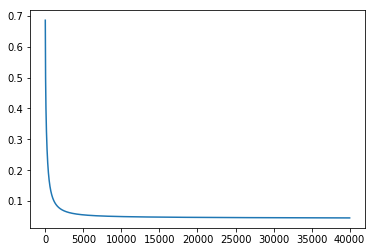

In [305]:
#for J_history in costs :
visualize_cost(costs[3])

In [57]:
pprint(classifiers)

[array([-3.6008707 ,  0.52086248, -1.53524942,  1.08702249, -3.95523762,
       -1.0612541 ,  2.29110342,  0.21486748,  4.09650304, -3.55194895,
       -4.16178004, -0.84902982,  0.14478133, -1.2653804 ,  4.23126941]),
 array([-3.6008707 ,  0.52086248, -1.53524942,  1.08702249, -3.95523762,
       -1.0612541 ,  2.29110342,  0.21486748,  4.09650304, -3.55194895,
       -4.16178004, -0.84902982,  0.14478133, -1.2653804 ,  4.23126941]),
 array([-3.6008707 ,  0.52086248, -1.53524942,  1.08702249, -3.95523762,
       -1.0612541 ,  2.29110342,  0.21486748,  4.09650304, -3.55194895,
       -4.16178004, -0.84902982,  0.14478133, -1.2653804 ,  4.23126941]),
 array([-3.6008707 ,  0.52086248, -1.53524942,  1.08702249, -3.95523762,
       -1.0612541 ,  2.29110342,  0.21486748,  4.09650304, -3.55194895,
       -4.16178004, -0.84902982,  0.14478133, -1.2653804 ,  4.23126941])]


### Predict

In [58]:
classifiers = np.array(classifiers)
print(classifiers.shape)

(4, 15)


In [62]:
probability = sigmoid(np.dot(X, classifiers[0]))
probability.shape
pprint(probability[0:30])
pprint(set(probability))

array([0.00289516, 0.00124968, 0.00403775, 0.99384054, 0.97770347,
       0.00229665, 0.99705475, 0.02403674, 0.99688579, 0.00340889,
       0.0341274 , 0.00495279, 0.03918473, 0.00132311, 0.01473612,
       0.00862966, 0.97080992, 0.99366316, 0.00604894, 0.00623088,
       0.99192617, 0.93712334, 0.00518514, 0.06532269, 0.00379854,
       0.00567241, 0.00213088, 0.06848041, 0.96047275, 0.00131628])
{0.00016087683162756492,
 0.0001808510800722395,
 0.00018182137344908563,
 0.00018973769592199371,
 0.00022222890628180388,
 0.0002223948238613871,
 0.0002475313113545279,
 0.00026042150123866504,
 0.0002700074396826416,
 0.00027187842151686343,
 0.0002792144517761241,
 0.0002846667429140996,
 0.0003110279856658908,
 0.0003183217389736865,
 0.000321231785386386,
 0.0003279695069290864,
 0.00033045747118382724,
 0.0003493952209555588,
 0.00035933200157132675,
 0.0003650722222928965,
 0.0003879473407067953,
 0.00039920526173347124,
 0.0004100561100821786,
 0.0004243252885313738,
 0.0004334194

In [63]:
#classProbabilities = sigmoid(X * classifiers.T)
classProbabilities = []
for i in range(0,4):
    probability = sigmoid(np.dot(X, classifiers[i]))
    print(probability.shape)
    print(probability)
    classProbabilities.append(probability)


(1600,)
[0.00289516 0.00124968 0.00403775 ... 0.99300818 0.00123006 0.00259793]
(1600,)
[0.00289516 0.00124968 0.00403775 ... 0.99300818 0.00123006 0.00259793]
(1600,)
[0.00289516 0.00124968 0.00403775 ... 0.99300818 0.00123006 0.00259793]
(1600,)
[0.00289516 0.00124968 0.00403775 ... 0.99300818 0.00123006 0.00259793]


In [81]:
classProbabilities = np.array(classProbabilities).T
classProbabilities.shape
print(classProbabilities[1].shape)

(1600,)


In [71]:
def find_max_index (liste):
    maximum = liste[0]
    index = 0
    for i in range (0, len(liste)) :
        if liste[i] > maximum :
            maximum = liste[i]
            index = i
    return i
    

In [82]:
predictions = []
for i in range (0, 1600) :
    probab = [classProbabilities[0][i], classProbabilities[1][i], classProbabilities[2][i], classProbabilities[3][i]]
    pprint(l)
    #print(find_max_index (probab))
    predictions.append(find_max_index (probab.copy()))

[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863

 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863

 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863

[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863

 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863540374]
[0.0025979305863540374,
 0.0025979305863540374,
 0.0025979305863

In [84]:
predictions = np.array(predictions)
predictions.shape

(1600,)

In [85]:
predictions[0:200]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])